In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
from pandas.compat import StringIO

sns.set(style="whitegrid")

### Boxplot non-hue

In [77]:
df = sns.load_dataset("tips")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided P_val=6.477e-01 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided P_val=4.690e-02 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided P_val=2.680e-02 U_stat=9.605e+02


(<matplotlib.axes._subplots.AxesSubplot at 0x7f09b0ec85c0>,
 [{'pvalue': 0.6476760217605698,
   'test_short_name': 'M.W.W.',
   'formatted_output': 'Mann-Whitney-Wilcoxon test two-sided P_val=6.477e-01 U_stat=6.305e+02',
   'box1': 'Thur',
   'box2': 'Fri'},
  {'pvalue': 0.04690063266167011,
   'test_short_name': 'M.W.W.',
   'formatted_output': 'Mann-Whitney-Wilcoxon test two-sided P_val=4.690e-02 U_stat=2.180e+03',
   'box1': 'Thur',
   'box2': 'Sat'},
  {'pvalue': 0.026802910185856933,
   'test_short_name': 'M.W.W.',
   'formatted_output': 'Mann-Whitney-Wilcoxon test two-sided P_val=2.680e-02 U_stat=9.605e+02',
   'box1': 'Sun',
   'box2': 'Fri'}])

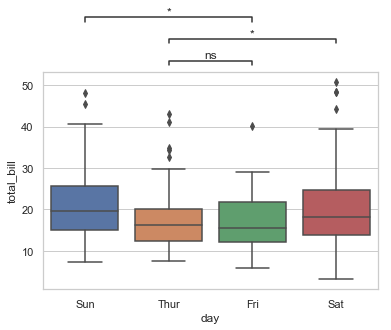

In [80]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')
test_results

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sun v.s. Thur: Custom statistical test, , P_val=1.000e-01
Sun v.s. Fri: Custom statistical test, , P_val=1.000e-03
Sun v.s. Sat: Custom statistical test, , P_val=1.000e-01


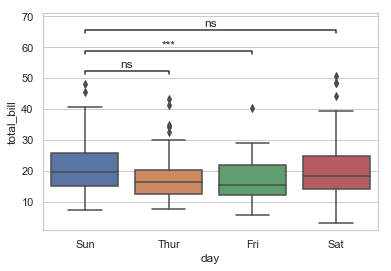

In [81]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("Sun", "Thur"), ("Sun", "Sat"), ("Fri", "Sun")],
                    perform_stat_test=False, pvalues=[0.1, 0.1, 0.001],
                    test=None, text_format='star', loc='inside', verbose=2);
plt.savefig('example_non-hue_inside.png', dpi=300, bbox_inches='tight')

### Boxplot with hue

Boxes with unequal ymax position.

In [82]:
df = sns.load_dataset('diamonds')
df = df[df['cut'].map(lambda x: x in ['Ideal', 'Premium'])]
# Modifying data to yield unequal boxes in the hue value
df.loc[df['cut'] == 'Ideal', 'price'] = df.loc[df['cut'] == 'Ideal', 'price'].map(lambda x: min(x, 5000))
df.loc[df['cut'] == 'Premium', 'price'] = df.loc[df['cut'] == 'Premium', 'price'].map(lambda x: min(x, 7500))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

I_Ideal v.s. I_Premium: t-test independent samples, P_val=9.660e-83 stat=-1.979e+01
E_Ideal v.s. E_Premium: t-test independent samples, P_val=4.604e-72 stat=-1.819e+01
J_Ideal v.s. J_Premium: t-test independent samples, P_val=9.192e-44 stat=-1.428e+01
F_Ideal v.s. F_Premium: t-test independent samples, P_val=1.943e-108 stat=-2.257e+01
G_Ideal v.s. G_Premium: t-test independent samples, P_val=1.020e-102 stat=-2.184e+01
D_Ideal v.s. D_Premium: t-test independent samples, P_val=6.247e-63 stat=-1.701e+01
H_Ideal v.s. H_Premium: t-test independent samples, P_val=7.152e-119 stat=-2.376e+01


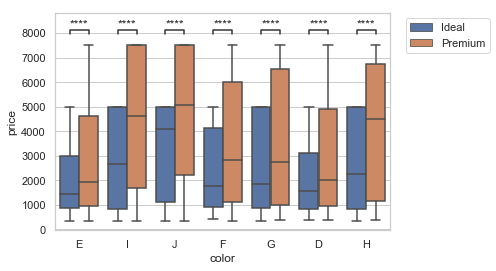

In [83]:
x = "color"
y = "price"
hue = "cut"
hue_order=['Ideal', 'Premium']
box_pairs=[
    (("E", "Ideal"), ("E", "Premium")),
    (("I", "Ideal"), ("I", "Premium")),
    (("J", "Ideal"), ("J", "Premium")),
    (("F", "Ideal"), ("F", "Premium")),
    (("G", "Ideal"), ("G", "Premium")),
    (("D", "Ideal"), ("D", "Premium")),
    (("H", "Ideal"), ("H", "Premium")),
    ]
ax = sns.boxplot(data=df, x=x, y=y, hue=hue,)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_hue_pairs.png', dpi=300, bbox_inches='tight')

In [84]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]
# Modifying data to yield unequal boxes in the hue value
df.loc[df['cut'] == 'Ideal', 'price'] = df.loc[df['cut'] == 'Ideal', 'price'].map(lambda x: min(x, 5000))
df.loc[df['cut'] == 'Premium', 'price'] = df.loc[df['cut'] == 'Premium', 'price'].map(lambda x: min(x, 7500))
df.loc[df['cut'] == 'Good', 'price'] = df.loc[df['cut'] == 'Good', 'price'].map(lambda x: min(x, 15000))
df.loc[df['cut'] == 'Very Good', 'price'] = df.loc[df['cut'] == 'Very Good', 'price'].map(lambda x: min(x, 3000))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

E_Ideal v.s. E_Premium: Mann-Whitney-Wilcoxon test two-sided P_val=1.560e-31 U_stat=3.756e+06
I_Ideal v.s. I_Premium: Mann-Whitney-Wilcoxon test two-sided P_val=5.141e-61 U_stat=1.009e+06
J_Ideal v.s. J_Premium: Mann-Whitney-Wilcoxon test two-sided P_val=4.018e-37 U_stat=2.337e+05
E_Ideal v.s. E_Good: Mann-Whitney-Wilcoxon test two-sided P_val=5.201e-19 U_stat=1.480e+06
I_Ideal v.s. I_Good: Mann-Whitney-Wilcoxon test two-sided P_val=5.008e-13 U_stat=4.359e+05
J_Ideal v.s. J_Good: Mann-Whitney-Wilcoxon test two-sided P_val=1.006e-04 U_stat=1.174e+05
E_Ideal v.s. E_Very Good: Mann-Whitney-Wilcoxon test two-sided P_val=1.736e-02 U_stat=4.850e+06
E_Good v.s. I_Ideal: Mann-Whitney-Wilcoxon test two-sided P_val=5.906e-01 U_stat=9.882e+05
I_Premium v.s. J_Ideal: Mann-Whitney-Wilcoxon test two-sided P_val=5.159e-27 U_stat=8.084e+05


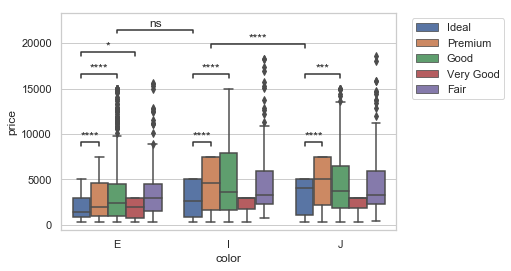

In [85]:
x = "color"
y = "price"
hue = "cut"
hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
box_pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal")),
    ]
ax = sns.boxplot(data=df, x=x, y=y, hue=hue,)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')

### Boxplot with bucketed categories

In [86]:
df = sns.load_dataset("tips")
df['tip_bucket'] = pd.cut(df['tip'], 3)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bucket
0,16.99,1.01,Female,No,Sun,Dinner,2,"(0.991, 4.0]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(0.991, 4.0]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(0.991, 4.0]"


In [87]:
# In this case we just have to pass the list of categories objects to the add_stat_annotation function.
tip_bucket_list = df['tip_bucket'].unique()
tip_bucket_list

[(0.991, 4.0], (4.0, 7.0], (7.0, 10.0]]
Categories (3, interval[float64]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Fri_(0.991, 4.0] v.s. Sat_(7.0, 10.0]: t-test independent samples, P_val=6.176e-07 stat=-7.490e+00


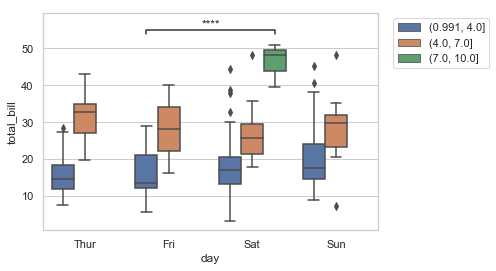

In [88]:
x = "day"
y = "total_bill"
hue = "tip_bucket"
data = df
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                    box_pairs=[(("Sat", tip_bucket_list[2]), ("Fri", tip_bucket_list[0]))],
                    test='t-test_ind', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_bucketed.png', dpi=300, bbox_inches='tight')

### Tuning y offsets

Sat_Yes v.s. Sat_No: t-test independent samples, P_val=4.304e-01 stat=7.922e-01
Thur_No v.s. Fri_No: t-test independent samples, P_val=7.425e-01 stat=-3.305e-01
Thur_Yes v.s. Sun_No: t-test independent samples, P_val=5.623e-01 stat=-5.822e-01


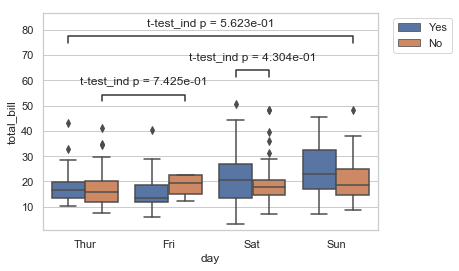

In [89]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
hue = "smoker"
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                    box_pairs=[(("Thur", "No"), ("Fri", "No")),
                                 (("Sat", "Yes"), ("Sat", "No")),
                                 (("Sun", "No"), ("Thur", "Yes"))
                                ],
                    test='t-test_ind', text_format='full', loc='inside',
                    line_offset_to_box=0.2, line_offset=0.1, line_height=0.05, text_offset=8,
                    verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_tuning_y_offsets.svg')
plt.savefig('example_tuning_y_offsets.png', dpi=300, bbox_inches='tight')

### Custom p-values as input

![](example_tuning_y_offsets_w_arguments.png)

In [90]:
df = sns.load_dataset("iris")
x = "species"
y = "sepal_length"

box_pairs = [("setosa", "versicolor"), ("setosa", "virginica"), ("versicolor", "virginica")]

from scipy.stats import bartlett

test_short_name = 'Bartlett'
pvalues = []
for pair in box_pairs:
    data1 = df.groupby(x)[y].get_group(pair[0])
    data2 = df.groupby(x)[y].get_group(pair[1])
    stat, p = bartlett(data1, data2)
    print("Performing Bartlett statistical test for equal variances on pair:",
          pair, "stat={:.2e} p-value={:.2e}".format(stat, p))
    pvalues.append(p)
print("pvalues:", pvalues)

Performing Bartlett statistical test for equal variances on pair: ('setosa', 'versicolor') stat=6.89e+00 p-value=8.66e-03
Performing Bartlett statistical test for equal variances on pair: ('setosa', 'virginica') stat=1.60e+01 p-value=6.38e-05
Performing Bartlett statistical test for equal variances on pair: ('versicolor', 'virginica') stat=2.09e+00 p-value=1.48e-01
pvalues: [0.008659557933879902, 6.378941946712463e-05, 0.14778816016231236]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

setosa v.s. versicolor: Custom statistical test, Bartlett, P_val=8.660e-03
versicolor v.s. virginica: Custom statistical test, Bartlett, P_val=1.478e-01
setosa v.s. virginica: Custom statistical test, Bartlett, P_val=6.379e-05


(<matplotlib.axes._subplots.AxesSubplot at 0x7f09b0ad1080>,
 [{'pvalue': 0.008659557933879902,
   'test_short_name': 'Bartlett',
   'formatted_output': 'Custom statistical test, Bartlett, P_val=8.660e-03',
   'box1': 'setosa',
   'box2': 'versicolor'},
  {'pvalue': 0.14778816016231236,
   'test_short_name': 'Bartlett',
   'formatted_output': 'Custom statistical test, Bartlett, P_val=1.478e-01',
   'box1': 'versicolor',
   'box2': 'virginica'},
  {'pvalue': 6.378941946712463e-05,
   'test_short_name': 'Bartlett',
   'formatted_output': 'Custom statistical test, Bartlett, P_val=6.379e-05',
   'box1': 'setosa',
   'box2': 'virginica'}])

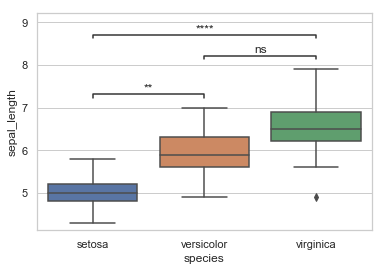

In [91]:
ax = sns.boxplot(data=df, x=x, y=y)
test_results = add_stat_annotation(ax, data=df, x=x, y=y,
                                   box_pairs=box_pairs,
                                   perform_stat_test=False, pvalues=pvalues, test_short_name=test_short_name,
                                   text_format='star', verbose=2)
test_results